<a href="https://colab.research.google.com/github/markriis/IDS-pollution-of-cities/blob/combining/descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing datasets from Data_prep.ipynb

In [1]:
# Importing modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

Setting up datasets

In [2]:
!wget https://github.com/markriis/IDS-pollution-of-cities/raw/combining/datasets.p
datasets = pickle.load(open( "datasets.p", "rb" ))# The data is already in the right format, just need to unpickle

--2023-12-07 18:21:38--  https://github.com/markriis/IDS-pollution-of-cities/raw/combining/datasets.p
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/combining/datasets.p [following]
--2023-12-07 18:21:39--  https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/combining/datasets.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1566301 (1.5M) [application/octet-stream]
Saving to: ‘datasets.p’

datasets.p          100%[===================>]   1.49M  --.-KB/s    in 0.01s   

2023-12-07 18:21:39 (125 MB/s) - ‘datasets.p’ saved [1566301/1566301]



# Collecting each dataset, seeing what they provide

In [3]:
from IPython.display import HTML

# A function for displaying dataframes side by side to make things easyer to view. https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [4]:
for name, dataset in datasets.items( ):
    stats = dataset.describe( )

    columns = stats.columns
    stats.loc[ 'std var (%)' ] = round( stats.loc[ 'std' ] / stats.loc[ 'mean' ] * 100, 4 )
    print( name )
    if dataset.shape[1] < 7:
      side_by_side(dataset.head(10), stats)
    else:
      display( dataset.head(10) )
      display( stats )

gasses


country  year  population           gdp  cement_co2  cement_co2_per_capita  \
0  Albania  1995   3284370.0  1.160073e+10       0.103                  0.031   
1  Albania  1996   3271336.0  1.272738e+10       0.105                  0.032   
2  Albania  1997   3253721.0  1.139651e+10       0.052                  0.016   
3  Albania  1998   3232185.0  1.246671e+10       0.044                  0.013   
4  Albania  1999   3208265.0  1.415186e+10       0.055                  0.017   
5  Albania  2000   3182027.0  1.521426e+10       0.094                  0.029   
6  Albania  2001   3153615.0  1.656384e+10       0.000                  0.000   
7  Albania  2002   3123554.0  1.740807e+10       0.000                  0.000   
8  Albania  2003   3092993.0  1.846550e+10       0.302                  0.098   
9  Albania  2004   3062629.0  1.958788e+10       0.300                  0.098   

     co2  co2_including_luc  co2_including_luc_growth_abs  \
0  2.089              2.581                        -0.034   
1  2.018              2.318                        -0.264   
2  1.543              1.788                        -0.530   
3  1.755              2.002                         0.214   
4  2.986              2.956                         0.954   
5  3.025              2.860                        -0.096   
6  3.221              2.996                         0.136   
7  3.748              3.397                         0.401   
8  4.303              4.450                         1.053   
9  4.177              3.220                        -1.230   

   co2_including_luc_growth_prct  ...  land_use_change_co2_per_capita  \
0                         -1.309  ...                           0.150   
1                        -10.212  ...                           0.092   
2                        -22.865  ...                           0.075   
3                         11.992  ...                           0.077   
4                         47.637  ...                          -0.010   
5                         -3.249  ...                          -0.052   
6                          4.768  ...                          -0.071   
7                         13.372  ...                          -0.113   
8                         31.005  ...                           0.047   
9                        -27.643  ...                          -0.312   

   methane  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
0     4.08               1.242           1.35                     0.411   
1     3.92               1.198           1.20                     0.367   
2     3.72               1.143           1.14                     0.350   
3     3.57               1.105           1.17                     0.362   
4     3.62               1.128           1.14                     0.355   
5     3.71               1.166           1.22                     0.383   
6     3.61               1.145           1.15                     0.365   
7     3.56               1.140           1.30                     0.416   
8     3.57               1.154           1.31                     0.424   
9     3.50               1.143           1.27                     0.415   

   oil_co2  oil_co2_per_capita  primary_energy_consumption  total_ghg  \
0    1.773               0.540                      22.728       7.59   
1    1.755               0.536                      25.011       7.32   
2    1.411               0.434                      22.844       6.59   
3    1.623               0.502                      24.572       6.82   
4    2.792               0.870                      22.114       8.03   
5    2.840               0.892                      28.732       8.42   
6    3.125               0.991                      27.233       7.00   
7    3.638               1.165                      29.497       7.64   
8    3.891               1.258                      33.270       8.05   
9    3.759               1.227                      35.487       8.12   

   to

year    population           gdp   cement_co2  \
count        2856.000000  2.856000e+03  2.280000e+03  2771.000000   
mean         2008.500000  5.208208e+07  5.549163e+11     9.572215   
std             8.079162  1.788987e+08  1.417939e+12    59.029550   
min          1995.000000  3.091000e+04  2.226639e+09     0.000000   
25%          2001.750000  3.622108e+06  3.979138e+10     0.351000   
50%          2008.500000  9.880616e+06  1.414419e+11     1.081000   
75%          2015.250000  3.372838e+07  4.194891e+11     3.681000   
max          2022.000000  1.425894e+09  1.815162e+13   858.233000   
std var (%)     0.402200  3.434937e+02  2.555230e+02   616.676000   

             cement_co2_per_capita           co2  co2_including_luc  \
count                  2771.000000   2828.000000        2828.000000   
mean                      0.153548    195.010033         240.489859   
std                       0.155534    811.841258         885.633321   
min                       0.000000      0.142000         -17.537000   
25%                       0.050000      8.029750          14.214000   
50%                       0.117000     37.604500          45.305000   
75%                       0.208000    114.702750         134.185000   
max                       1.128000  11396.777000       12378.281000   
std var (%)             101.293800    416.307400         368.262200   

             co2_including_luc_growth_abs  co2_including_luc_growth_prct  \
count                         2828.000000                    2828.000000   
mean                             3.835025                       5.739981   
std                             76.189749                     258.159810   
min                          -1363.620000                   -4090.561000   
25%                             -2.767500                      -6.000000   
50%                              0.031500                       0.135000   
75%                              2.847500                       6.145750   
max                           1771.624000                   11230.138000   
std var (%)                   1986.682100                    4497.572600   

             co2_including_luc_per_capita  ...  \
count                         2828.000000  ...   
mean                             6.900796  ...   
std                              7.509710  ...   
min                             -1.978000  ...   
25%                              2.241750  ...   
50%                              5.018000  ...   
75%                              8.993000  ...   
max                             76.641000  ...   
std var (%)                    108.823800  ...   

             land_use_change_co2_per_capita      methane  methane_per_capita  \
count                           2828.000000  2626.000000         2626.000000   
mean                               0.797634    50.089212            1.846831   
std                                2.862972   127.750437            2.830709   
min                               -7.034000     0.000000            0.000000   
25%                               -0.162500     4.192500            0.712000   
50%                                0.071000    11.470000            0.987000   
75%                                0.967250    46.205000            1.467000   
max                               33.272000  1186.570000           23.780000   
std var (%)                      358.933200   255.045800          153.273800   

             nitrous_oxide  nitrous_oxide_per_capita      oil_co2  \
count          2626.000000               2626.000000  2828.000000   
mean             19.144768                  0.623434    59.708401   
std              53.496450                  0.772146   139.776412   
min               0.000000                  0.000000     0.092000   
25%               1.502500                  0.246000     4.547250   
50%               5.420000                  0.374000    15.202000   
75%              16.212500                  0.598000    44.900500   
max

air


development


country  hdi_1995  hdi_1996  hdi_1997  hdi_1998  hdi_1999  hdi_2000  \
0     Albania     0.634     0.645     0.642     0.657     0.669     0.677   
1     Andorra       NaN       NaN       NaN       NaN       NaN     0.818   
2   Argentina     0.745     0.751     0.756     0.762     0.773     0.779   
3   Australia     0.882     0.884     0.887     0.891     0.894     0.896   
4     Austria     0.849     0.853     0.857     0.863     0.866     0.871   
5     Belgium     0.865     0.871     0.876     0.878     0.882     0.887   
6  Bangladesh     0.436     0.441     0.453     0.467     0.481     0.485   
7    Bulgaria     0.700     0.711     0.706     0.716     0.720     0.725   
8     Bahrain     0.772     0.778     0.780     0.785     0.789     0.798   
9     Bahamas     0.781     0.787     0.784     0.785     0.794     0.799   

   hdi_2001  hdi_2002  hdi_2003  ...    gnipc_2012    gnipc_2013  \
0     0.684     0.689     0.696  ...  11146.263030  11552.982470   
1     0.825     0.832     0.841  ...  47126.814610  46385.095200   
2     0.784     0.785     0.793  ...  23557.513140  23915.419720   
3     0.900     0.902     0.906  ...  44878.417640  45260.609170   
4     0.876     0.879     0.881  ...  52887.194300  52625.835170   
5     0.890     0.892     0.895  ...  48583.466850  48783.268940   
6     0.492     0.499     0.505  ...   3462.220186   3614.372724   
7     0.734     0.740     0.749  ...  19080.577530  18915.576550   
8     0.804     0.804     0.806  ...  43372.150560  44935.818000   
9     0.801     0.804     0.805  ...  36161.312770  34438.391960   

     gnipc_2014    gnipc_2015    gnipc_2016    gnipc_2017    gnipc_2018  \
0  11691.648290  12016.297600  12484.624200  12802.148310  13302.705960   
1  48483.720320  49936.874540  52267.738320  52650.225760  53483.306630   
2  23087.869640  23508.767380  22694.285100  22996.671420  21924.731190   
3  45851.642010  46307.576170  46558.178270  47085.227140  47487.644070   
4  52720.297690  52450.238770  53662.574170  53665.026680  54587.744450   
5  49281.304050  50027.991300  50509.146660  50904.689090  51249.226800   
6   3742.516573   3936.276588   4142.902911   4339.489843   4642.820099   
7  19464.439820  19798.969860  20532.416760  20986.654630  21585.237350   
8  45615.582470  45441.147620  45331.790710  45033.830540  43818.920530   
9  34482.273000  34554.603140  34055.549390  34332.571460  34103.975680   

     gnipc_2019    gnipc_2020    gnipc_2021  
0  13485.311240  12996.762910  14131.110390  
1  54465.047400  47878.666640  51166.626610  
2  21197.741040  19178.331840  20925.268140  
3  47312.192000  47078.244460  49238.433350  
4  55323.039150  51574.183060  53618.671380  
5  52434.098380  49391.996840  52293.399770  
6   4964.471473   5108.160545   5472.104781  
7  22731.966430  22020.493930  23078.955950  
8  42664.292180  39030.385710  39497.247880  
9  34676.989870  29190.838700  30486.184290  

[10 rows x 82 columns]

hdi_1995   hdi_1996   hdi_1997   hdi_1998   hdi_1999   hdi_2000  \
count        89.000000  89.000000  89.000000  89.000000  90.000000  96.000000   
mean          0.682674   0.689225   0.695449   0.701798   0.704522   0.707417   
std           0.131755   0.132149   0.132476   0.133252   0.134970   0.139755   
min           0.342000   0.354000   0.364000   0.373000   0.382000   0.287000   
25%           0.612000   0.620000   0.627000   0.639000   0.638750   0.633000   
50%           0.688000   0.693000   0.700000   0.703000   0.708000   0.711000   
75%           0.777000   0.782000   0.789000   0.799000   0.801750   0.812000   
max           0.882000   0.884000   0.887000   0.895000   0.901000   0.913000   
std var (%)  19.299800  19.173600  19.048900  18.987200  19.157600  19.755800   

              hdi_2001   hdi_2002   hdi_2003   hdi_2004  ...    gnipc_2012  \
count        96.000000  96.000000  98.000000  98.000000  ...    101.000000   
mean          0.713885   0.719187   0.722673   0.729051  ...  24507.004872   
std           0.139115   0.138464   0.139011   0.137421  ...  20898.280810   
min           0.301000   0.309000   0.313000   0.327000  ...   1434.245449   
25%           0.637750   0.643500   0.650000   0.651750  ...  10038.188310   
50%           0.718000   0.723000   0.732000   0.737500  ...  18233.045460   
75%           0.821250   0.830500   0.834000   0.835250  ...  35441.884810   
max           0.911000   0.912000   0.919000   0.927000  ...  90093.229670   
std var (%)  19.487100  19.252900  19.235700  18.849300  ...     85.274700   

                gnipc_2013     gnipc_2014     gnipc_2015     gnipc_2016  \
count           101.000000     101.000000     101.000000     101.000000   
mean          24973.846198   25427.944580   25853.809097   26444.998905   
std           21226.543056   21582.290779   21587.506046   22652.790488   
min            1486.198892    1505.548661    1494.630382    1507.431247   
25%           10016.178010   10170.842490   10239.789550   10197.401120   
50%           18061.009790   18423.543380   18777.738860   19021.831000   
75%           35204.724550   35876.793700   37716.500480   38616.277050   
max          102002.021800  105224.720600  106691.375900  126592.349700   
std var (%)      84.995100      84.876300      83.498400      85.660000   

                gnipc_2017     gnipc_2018     gnipc_2019     gnipc_2020  \
count           101.000000     101.000000     101.000000     101.000000   
mean          27085.111507   27530.032365   27848.898196   26361.066485   
std           23513.367122   23684.079850   23701.524336   22924.780285   
min            1541.173158    1548.073162    1559.741867    1419.679656   
25%           10589.126450   11027.267020   11034.204220   10046.071610   
50%           20086.504450   20925.347110   21197.741040   18753.910880   
75%           39543.656870   40234.643140   40725.590880   39015.075450   
max          141328.183500  144933.863800  146186.979600  142613.910900   
std var (%)      86.812900      86.030000      85.107600      86.964500   

                gnipc_2021  
count           101.000000  
mean          27694.662389  
std           24068.899420  
min            1483.520983  
25%            9980.110866  
50%           20838.801290  
75%           39746.019870  
max          146829.700600  
std var (%)      86.908100  

[9 rows x 81 columns]

populations


Seeing how big our datasets are

In [5]:
for name, dataset in datasets.items( ):
    print( f'{name} - { len( dataset ) }' )

gasses - 2856
air - 6136
development - 102
populations - 7948


# Data cleaning

Starting with air quality and water pollution

In [6]:
%%script false --no-raise-error
# Cleaning the column names
# Old: Index(['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"'],

new_cols = {
    'City' : 'City',
    ' "Region"' : 'Region',
    ' "Country"' : 'Country',
    ' "AirQuality"' : 'AirQuality',
    ' "WaterPollution"' : 'WaterPollution'
}

air_and_water.columns = [ new_cols[ col ] for col in air_and_water.columns ]
print( air_and_water.columns )

In [7]:
%%script false --no-raise-error
# Grouping data by country
air_and_water[ 'AirQuality' ] = pd.to_numeric( air_and_water[ 'AirQuality' ] )
air_and_water[ 'WaterPollution' ] = pd.to_numeric( air_and_water[ 'WaterPollution' ] )

air_and_water_country = air_and_water.groupby( 'Country' ).agg(
    {
        'AirQuality' : 'median',
        'WaterPollution' : 'median'
    }
)

# Remove the " from country names
air_and_water_country.index = air_and_water_country.index.str.replace( '"', '' )
print( air_and_water_country.isna( ).sum( ) )

air_and_water_country # Were done cleaning this dataset



Also repeat the same process with gasses dataframe

0     1     26    25    24    23    22    21    20    19  ...    10  \
index  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  ...  2013   
year    102   102   102   102   102   102   102   102   102   102  ...   102   

         9     8     7     6     5     4     3     2     27  
index  2014  2015  2016  2017  2018  2019  2020  2021  2022  
year    102   102   102   102   102   102   102   102   102  

[2 rows x 28 columns]

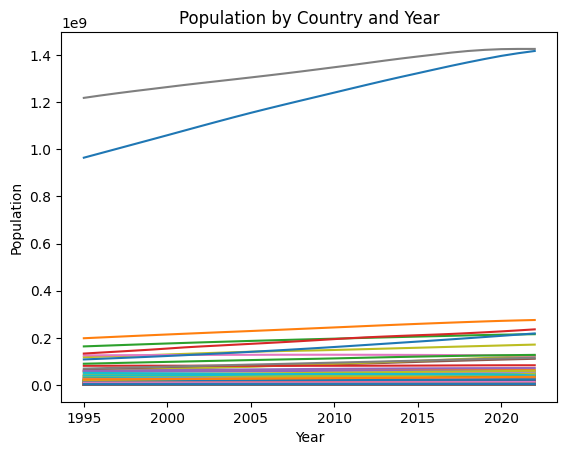

Country    Albania     Algeria  Andorra   Argentina   Australia    Austria  \
Year                                                                         
1995     3284370.0  28478024.0  62944.0  34946116.0  18003002.0  7947293.0   
1996     3271336.0  28984640.0  64166.0  35389360.0  18211850.0  7958043.0   
1997     3253721.0  29476030.0  64702.0  35815968.0  18410254.0  7967086.0   
1998     3232185.0  29924664.0  65204.0  36233196.0  18601666.0  7975856.0   
1999     3208265.0  30346086.0  65675.0  36653032.0  18800892.0  7991382.0   
2000     3182027.0  30774624.0  66116.0  37070772.0  19017968.0  8010425.0   
2001     3153615.0  31200984.0  67841.0  37480492.0  19248146.0  8039633.0   
2002     3123554.0  31624700.0  70868.0  37885024.0  19475842.0  8078994.0   
2003     3092993.0  32055882.0  73929.0  38278164.0  19699004.0  8120105.0   
2004     3062629.0  32510184.0  76950.0  38668796.0  19925060.0  8171215.0   
2005     3032636.0  32956690.0  79845.0  39070504.0  20171732.0  8227034.0   
2006     3003391.0  33435082.0  80241.0  39476856.0  20467032.0  8267771.0   
2007     2976089.0  33983836.0  78187.0  39876116.0  20830832.0  8294720.0   
2008     2951690.0  34569592.0  76073.0  40273768.0  21247876.0  8321134.0   
2009     2930553.0  35196040.0  73879.0  40684344.0  21660898.0  8342939.0   
2010     2913402.0  35856348.0  71542.0  41100124.0  22019166.0  8362829.0   
2011     2900660.0  36543548.0  70587.0  41520736.0  22357032.0  8391201.0   
2012     2892191.0  37260568.0  71035.0  41952364.0  22729272.0  8429641.0   
2013     2887019.0  38000628.0  71385.0  42388268.0  23111788.0  8479542.0   
2014     2884100.0  38760168.0  71644.0  42824064.0  23469578.0  8546066.0   
2015     2882482.0  39543148.0  71766.0  43257064.0  23820240.0  8642422.0   
2016     2881064.0  40339328.0  72563.0  43668236.0  24195706.0  8736491.0   
2017     2879361.0  41136548.0  73853.0  44054616.0  24590336.0  8797497.0   
2018     2877019.0  41927008.0  75034.0  44413592.0  24979228.0  8840518.0   
2019     2873883.0  42705372.0  76361.0  44745516.0  25357168.0  8879939.0   
2020     2866850.0  43451668.0  77723.0  45036032.0  25670052.0  8907780.0   
2021     2854710.0  44177964.0  79057.0  45276788.0  25921094.0  8922086.0   
2022     2842318.0  44903228.0  79843.0  45510324.0  26177410.0  8939617.0   

Country   Bahamas    Bahrain   Bangladesh     Belgium  ...  Switzerland  \
Year                                                   ...                
1995     299567.0   612941.0  117793336.0  10095204.0  ...    7038302.0   
1996     304944.0   632763.0  119876872.0  10123230.0  ...    7069694.0   
1997     310183.0   652651.0  122039232.0  10154876.0  ...    7086993.0   
1998     315410.0   672484.0  124350472.0  10188541.0  ...    7108225.0   
1999     320282.0   692138.0  126754824.0  10224223.0  ...    7142199.0   
2000     325033.0   711446.0  129193336.0  10264351.0  ...    7182052.0   
2001     329639.0   730263.0  131670488.0  10309249.0  ...    7224413.0   
2002     334015.0   748332.0  134139824.0  10355569.0  ...    7276479.0   
2003     338505.0   778260.0  136503216.0  10402550.0  ...    7330729.0   
2004     343097.0   833454.0  138789728.0  10456164.0  ...    7381153.0   
2005     347815.0   901928.0  140912592.0  10516979.0  ...    7428437.0   
2006     352672.0   970986.0  142628832.0  10582970.0  ...    7475014.0   
2007     357678.0  1040545.0  144135936.0  10653698.0  ...    7541909.0   
2008     362807.0  1110352.0  145421328.0  10726720.0  ...    7638288.0   
2009     368064.0  1179460.0  146706816.0  10801357.0  ...    7734402.0   
2010     373277.0  1213655.0  148391136.0  10877948.0  ...    7822444.0   
2011     377956.0  1212086.0  150211008.0  10955742.0  ...    7910988.0   
2012     382073.0  1224948.0  152090656.0  11031140.0  ...    7995738.0   
2013     385660.0  1261683.0  154030144.0  11103260.0  ...    8088370.0   
2014     389137.0  1311142.0  155961312.0  11176727.0  ...    8187792.0   
2015     

In [8]:
# Check how many unique years there are, were only looking for data after 1990 (hdi dataset low range)
# NEW I limited the begenning of the data to 1995 to get the ammount of NaN down.
# latest year is 2022 so we het first 2022 - 1995 = 27 entries + 1 = 28
display( datasets['gasses'][ 'year' ].value_counts( ).reset_index( ).sort_values( by='year', ascending=False ).head( 28 ).T )

# 259 countries have 1990-2021 data
# 247 countries have 2022 year data aswell
# lets only use the countries that have data up to 2022

# Fill NaN's with 0
datasets['gasses'] = datasets['gasses'].fillna( 0 )

# Visualise the population growth by year for each country, starting from the year 1990 and where there is data until 2022
filtered_gasses = datasets['gasses'][ ( datasets['gasses'][ 'year' ] <= 2022 ) ]
grouped = filtered_gasses.groupby([ 'country', 'year' ])

data = [ ]
for name, group in grouped:
    country, year = name
    population = group[ 'population' ].mean( )
    data.append(( year, country, population ))

populations = pd.DataFrame( data, columns=[ 'Year', 'Country', 'Population' ]).pivot( index='Year', columns='Country', values='Population' )

# Show the populations
populations.plot( kind='line' )
plt.title( 'Population by Country and Year' )
plt.xlabel( 'Year' )
plt.ylabel( 'Population' )
plt.legend( ).remove( ) # too big, only want to see generalized data
plt.show()

populations

Generated historical data for gdp, access the dataframe with `gasses_yearly_data["gdp"]`
Generated historical data for cement_co2, access the dataframe with `gasses_yearly_data["cement_co2"]`
Generated historical data for cement_co2_per_capita, access the dataframe with `gasses_yearly_data["cement_co2_per_capita"]`
Generated historical data for co2, access the dataframe with `gasses_yearly_data["co2"]`
Generated historical data for co2_including_luc, access the dataframe with `gasses_yearly_data["co2_including_luc"]`
Generated historical data for co2_including_luc_growth_abs, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_abs"]`
Generated historical data for co2_including_luc_growth_prct, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_prct"]`
Generated historical data for co2_including_luc_per_capita, access the dataframe with `gasses_yearly_data["co2_including_luc_per_capita"]`
Generated historical data for co2_including_luc_per_gdp, a

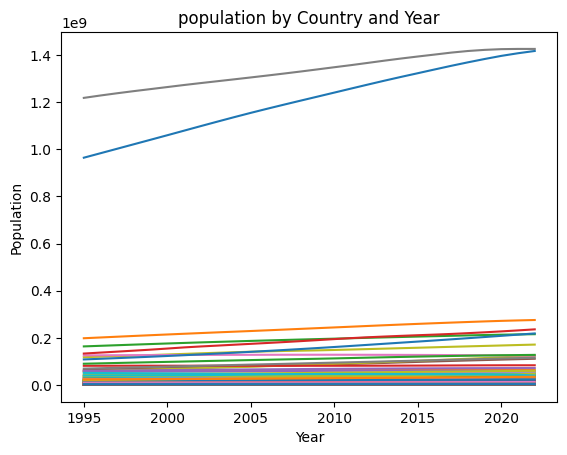

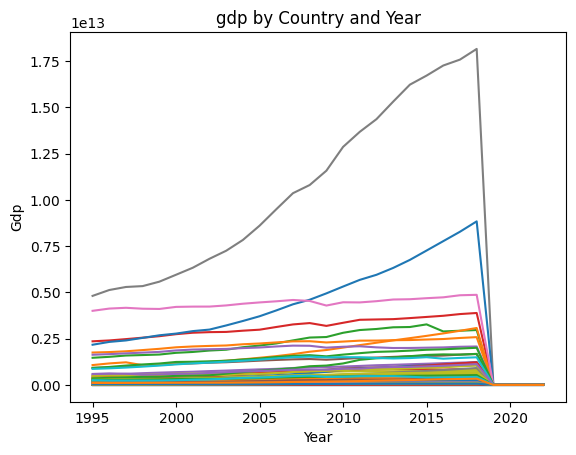

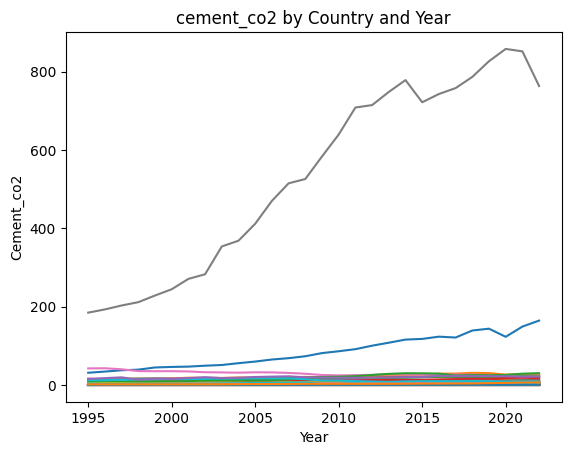

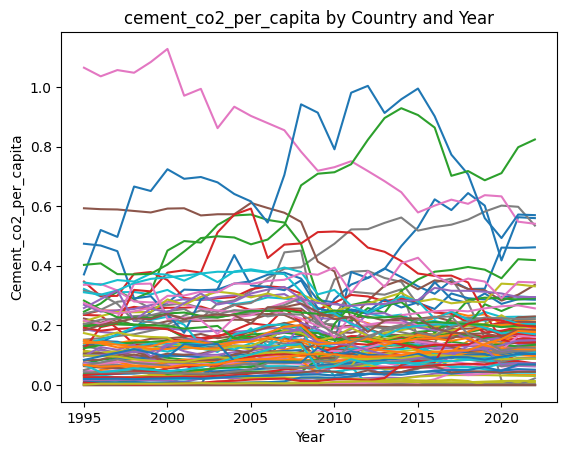

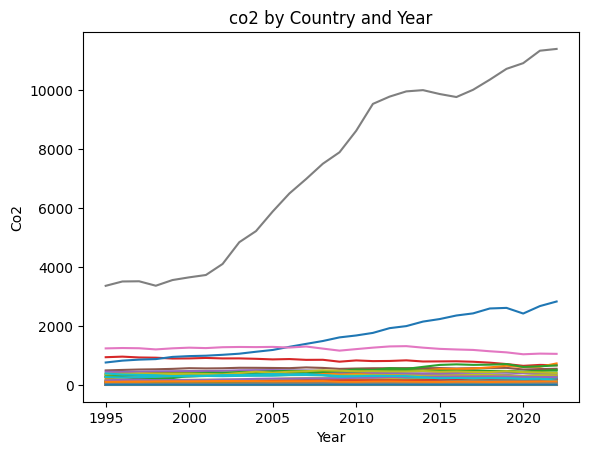

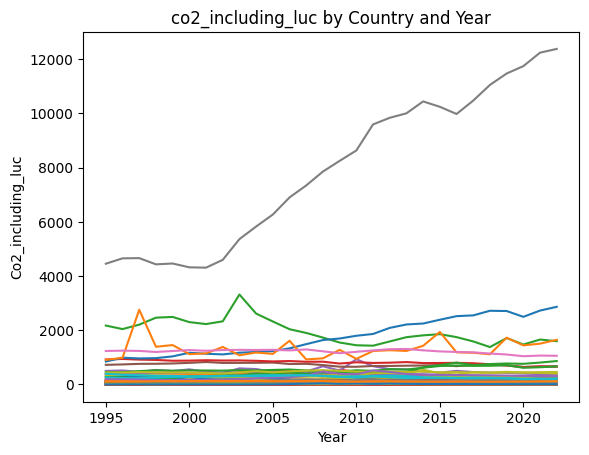

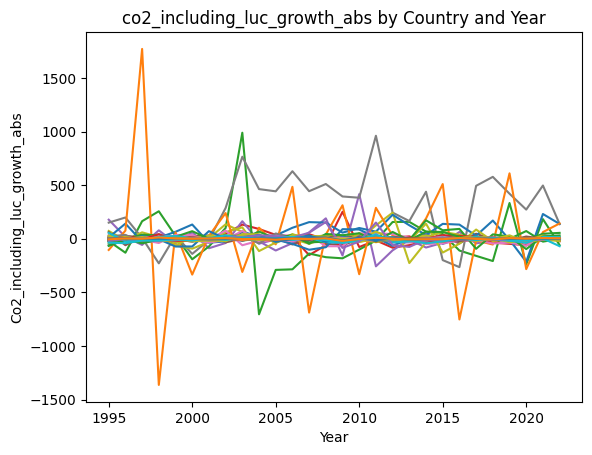

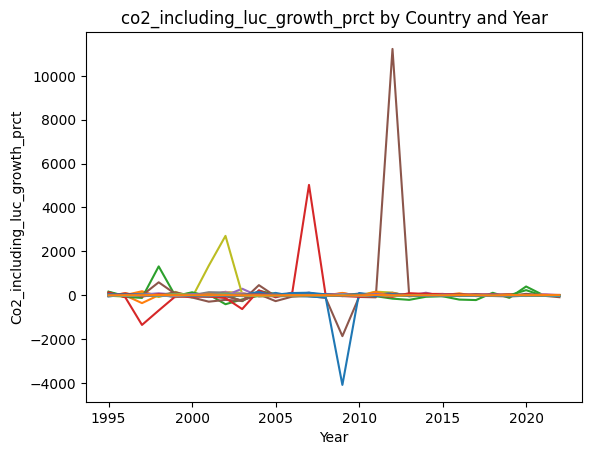

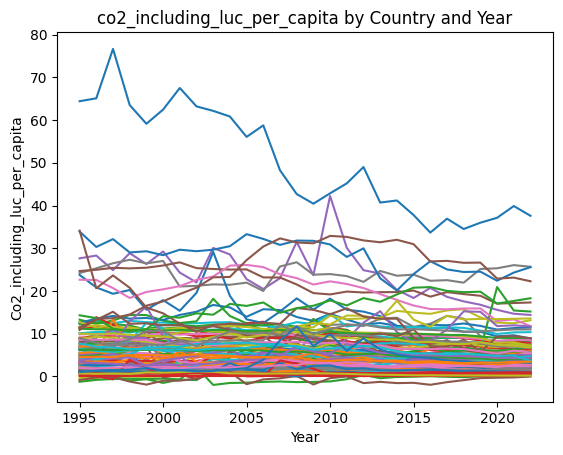

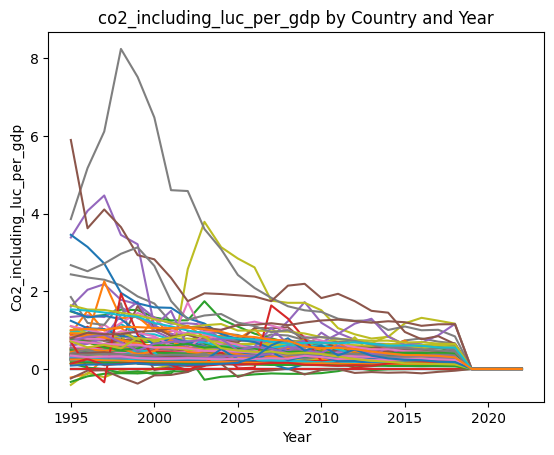

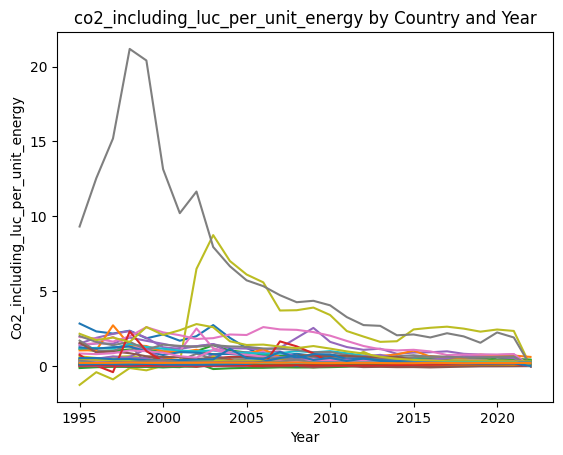

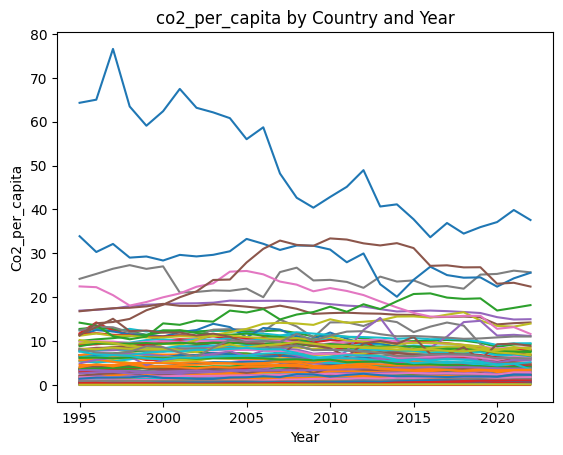

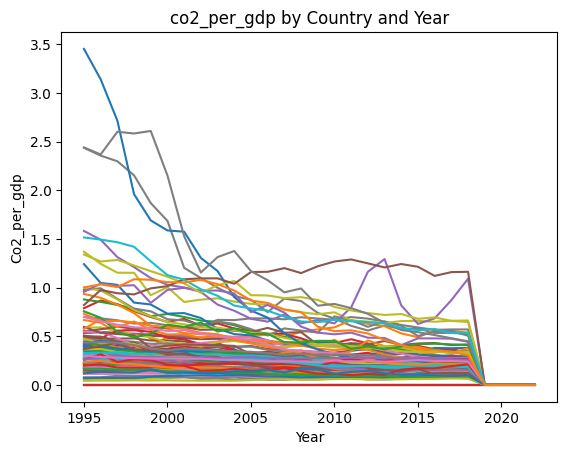

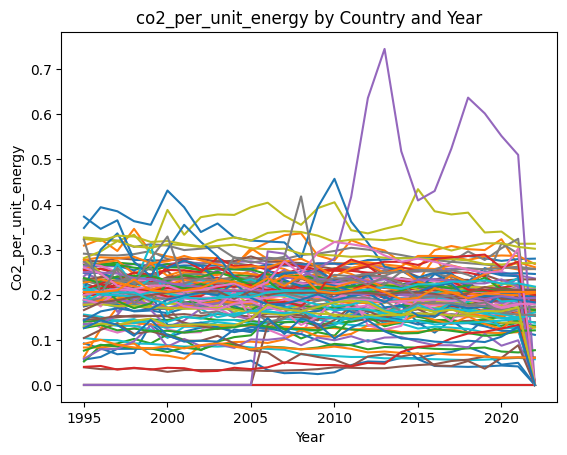

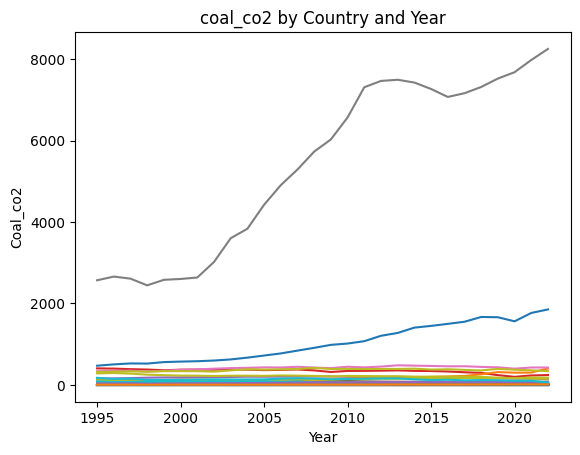

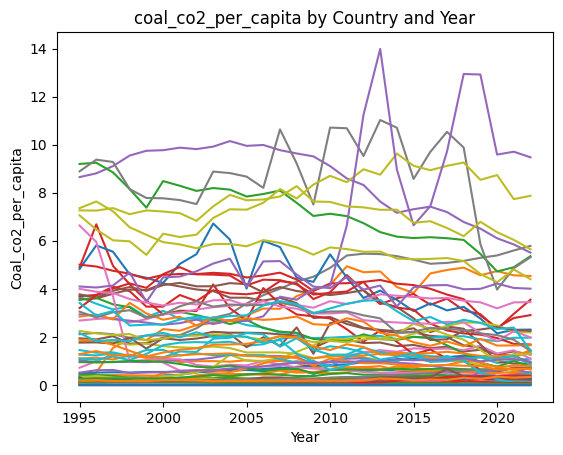

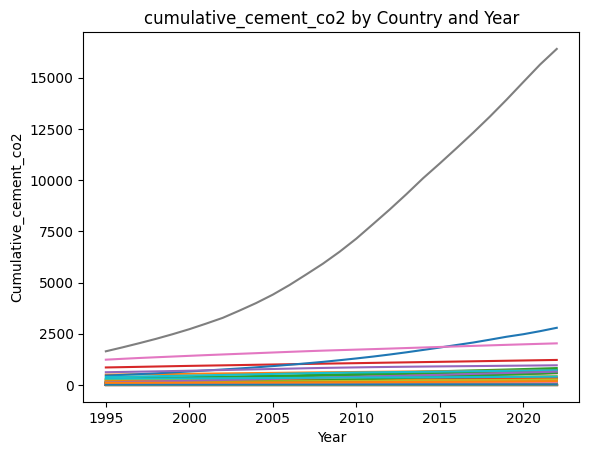

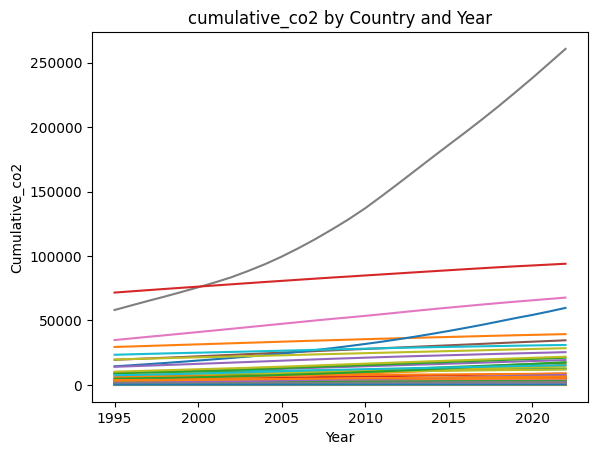

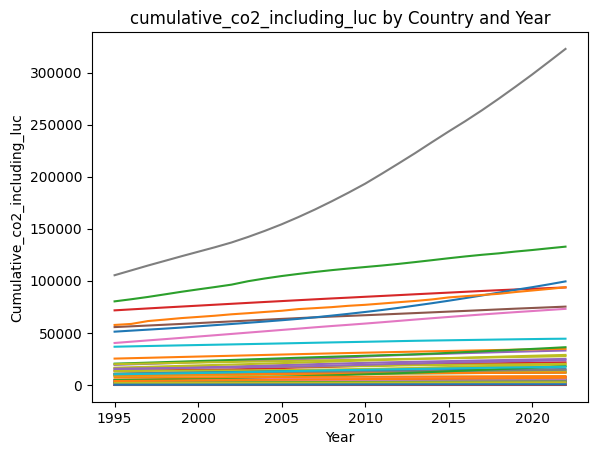

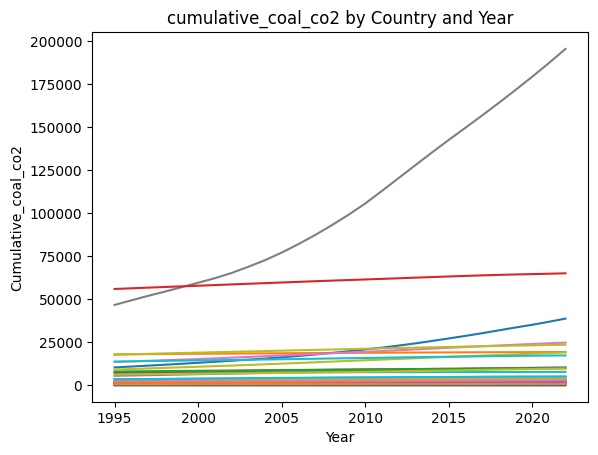

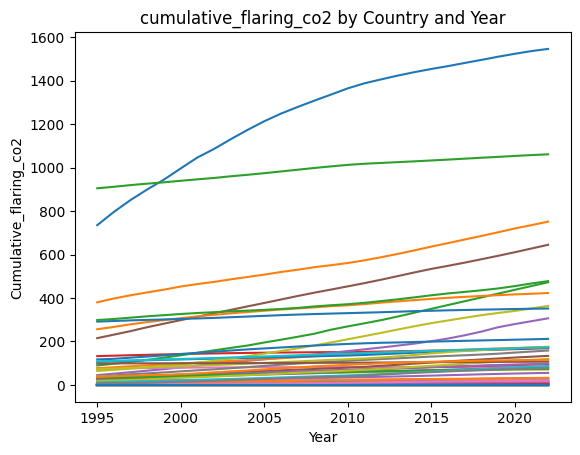

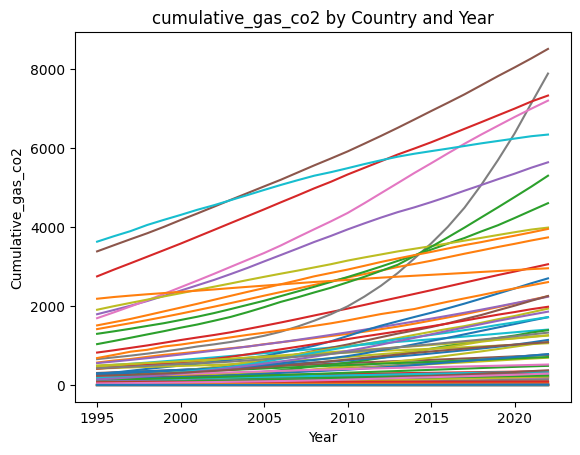

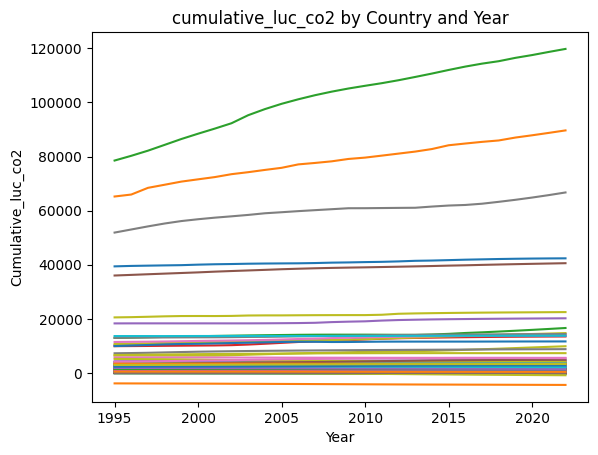

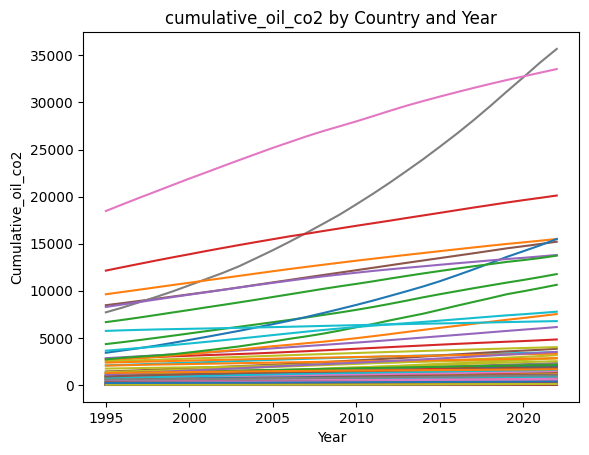

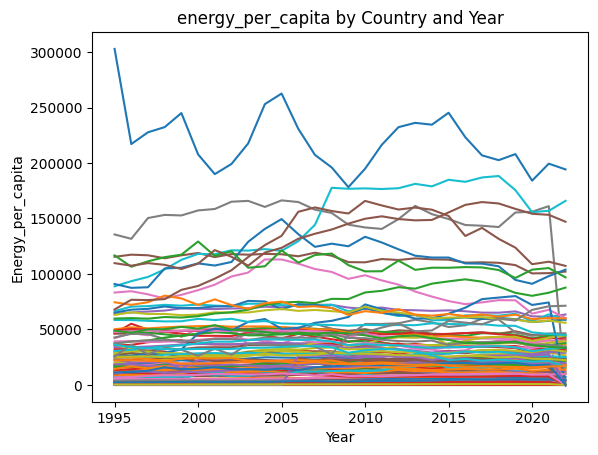

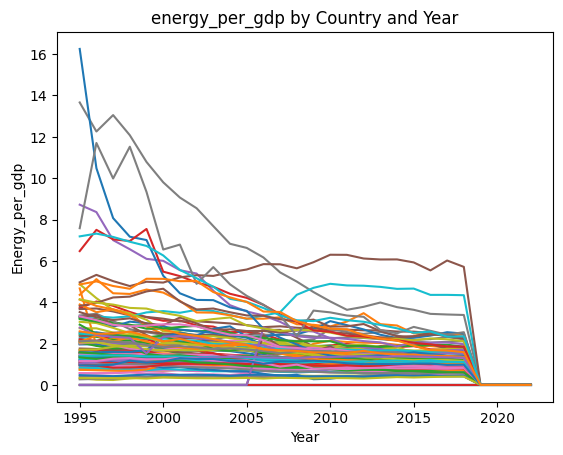

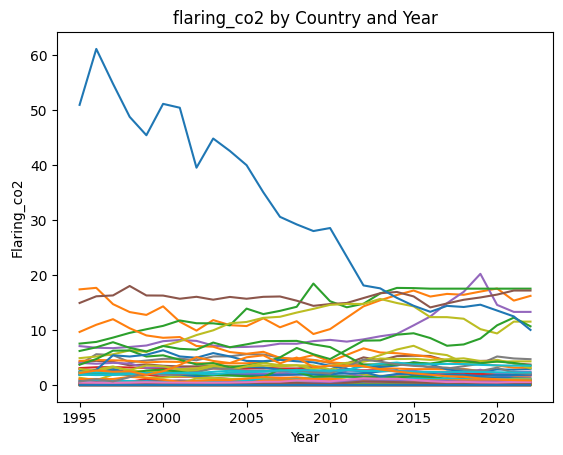

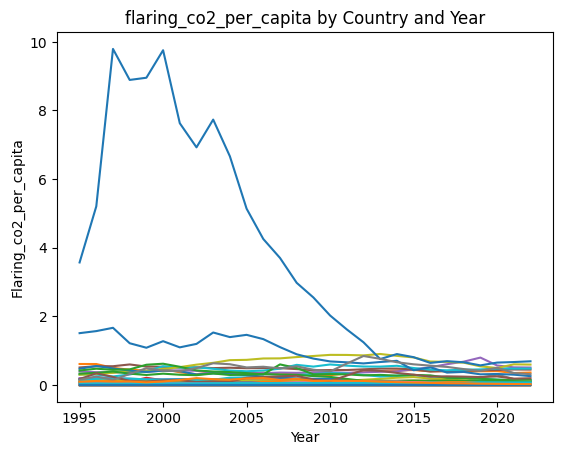

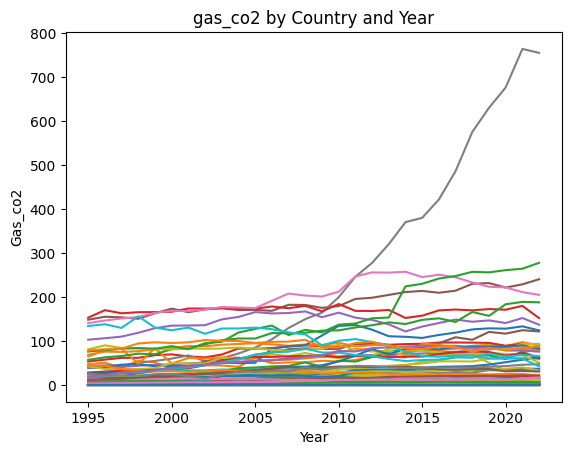

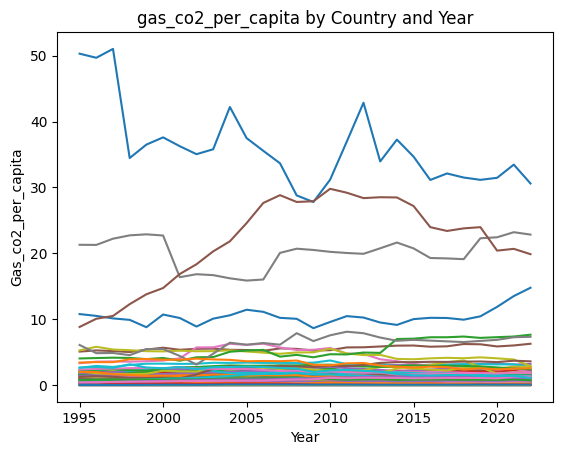

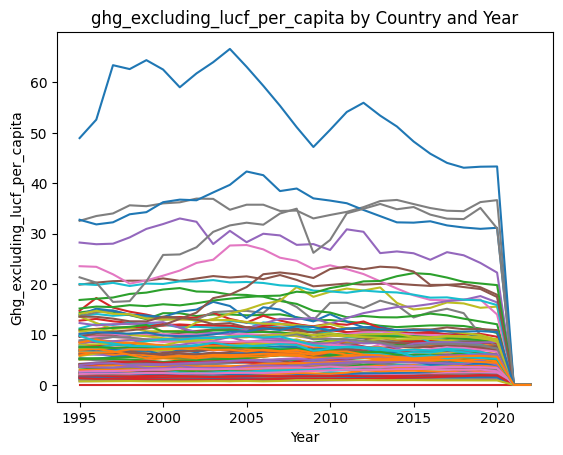

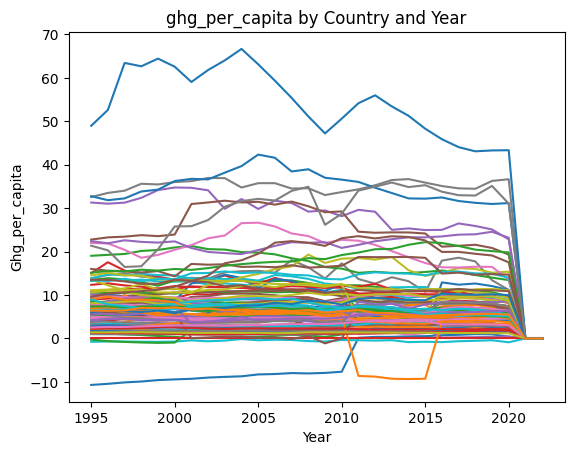

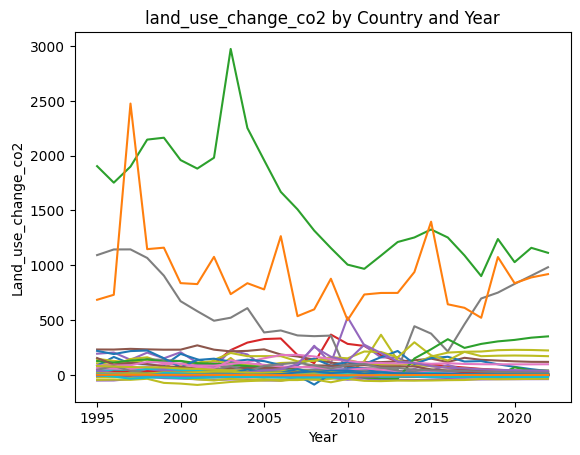

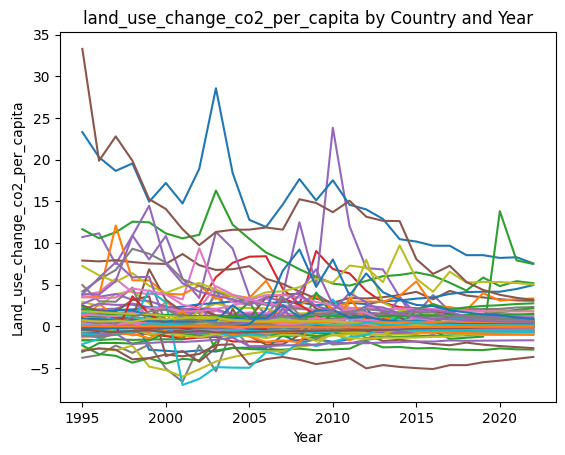

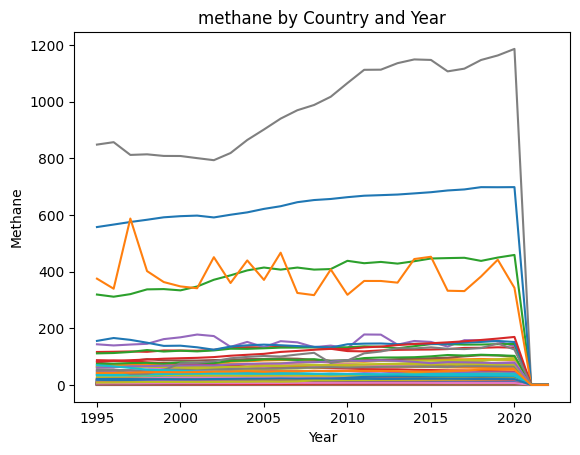

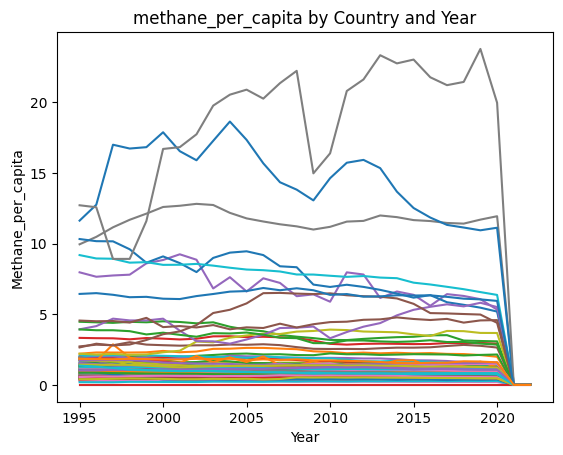

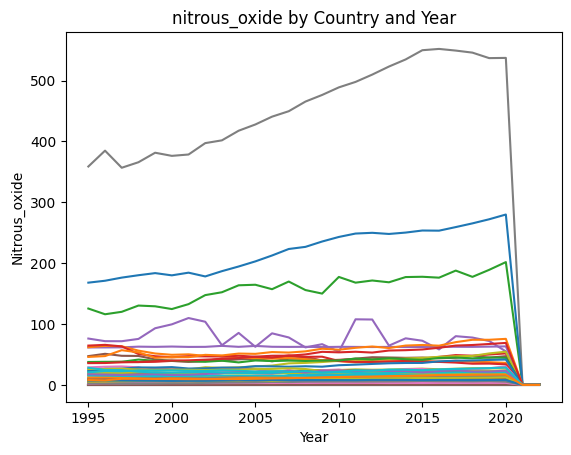

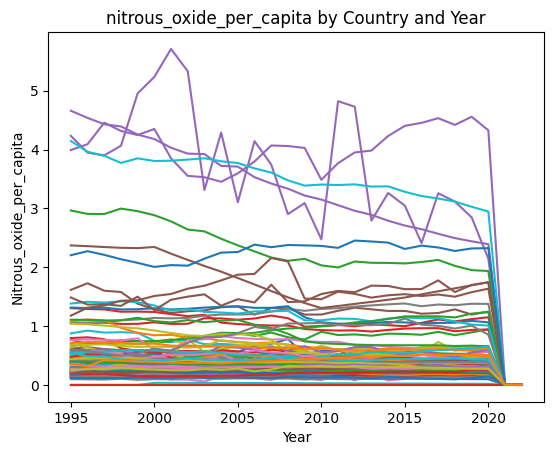

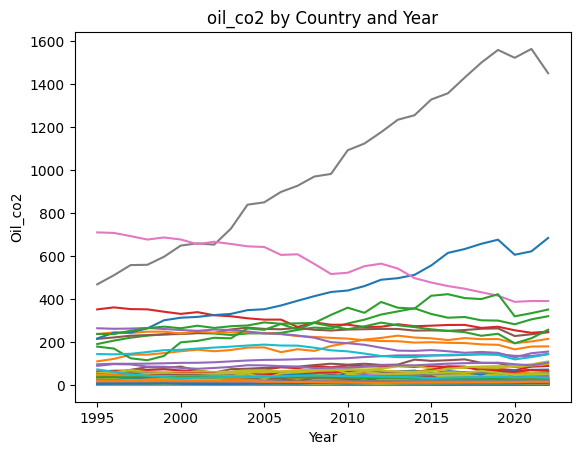

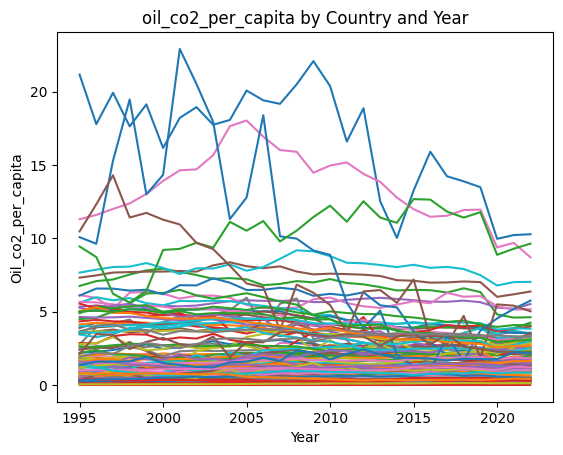

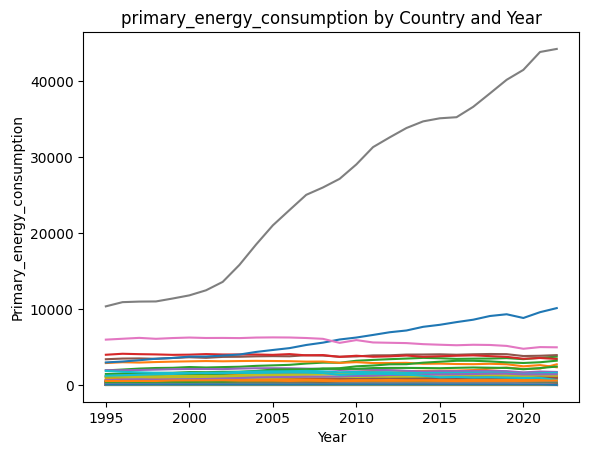

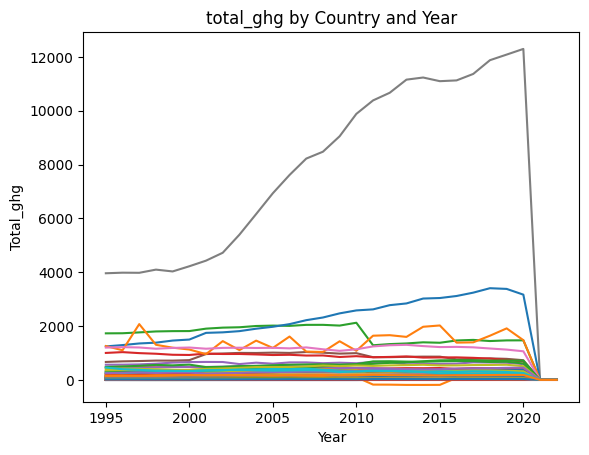

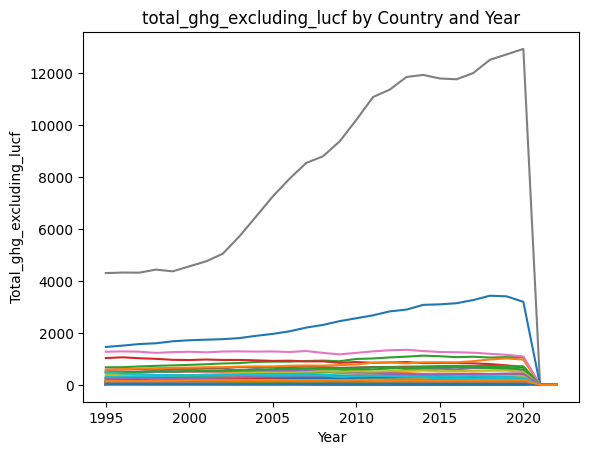

In [9]:
# Do the same for co2 stats and gdp
# ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
#        'cement_co2_per_capita', 'co2', 'co2_including_luc',
#        'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
#        'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
#        'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
#        'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
#        'consumption_co2', 'consumption_co2_per_capita',
#        'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
#        'cumulative_co2_including_luc', 'cumulative_coal_co2',
#        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
#        'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
#        'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
#        'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
#        'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
#        'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
#        'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
#        'other_industry_co2', 'primary_energy_consumption', 'total_ghg',
#        'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share']
# All indexes of the gasses dataframe

def create_dataframe( column_to_track : str ) -> pd.DataFrame:
    grouped = filtered_gasses.groupby([ 'country', 'year' ])

    data = [ ]
    for name, group in grouped:
        country, year = name
        coldata = group[ column_to_track ].mean( )
        data.append(( year, country, coldata ))

    return pd.DataFrame( data, columns=[ 'Year', 'Country', column_to_track ]).pivot( index='Year', columns='Country', values=column_to_track )

def graph_gasses_dataframe( df : pd.DataFrame, name : str ):
    df.plot( kind='line' )
    plt.title( f'{ name } by Country and Year' )
    plt.xlabel( 'Year' )
    plt.ylabel( name.capitalize( ) )
    plt.legend( ).remove( )
    plt.show( )

gasses_yearly_data = {
    'population' : populations
}

# Population is index 2, so we want to start from gdp
for colname in datasets['gasses'].columns[ 3: ]:
    gasses_yearly_data[ colname ] = create_dataframe( colname )
    print( f'Generated historical data for { colname }, access the dataframe with `gasses_yearly_data["{ colname }"]`' )

for name, df in gasses_yearly_data.items( ):
    graph_gasses_dataframe( df, name )


# Making the data useable

Some spikes in gdp, co2_per_capita, co2_per_gdp, oil_co2_per_capita

Features spiking interest or I think are useable: population, gdp, cement_co2, cement_co2_per_capita, co2, co2_including_luc (land-use change?), co2_per_capita, co2_per_gdp, coal_co2, energy_per_capita, energy_per_gdp (0 starting from 2018), gas_co2, gas_co2_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita, primary_energy_consumption

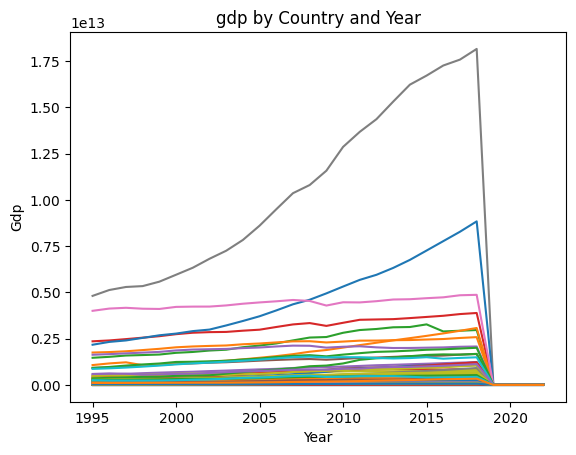

In [10]:
# gasses_yearly_data[ 'gdp' ].drop( 'World', inplace=True )
gasses_yearly_data[ 'gdp' ]
# issue: gdp is 0 for 95 countries
# print( gasses_yearly_data[ 'gdp' ].describe( ).loc[ 'max' ] )
graph_gasses_dataframe( gasses_yearly_data["gdp"], 'gdp' )

# weird influxes were caused by the world data

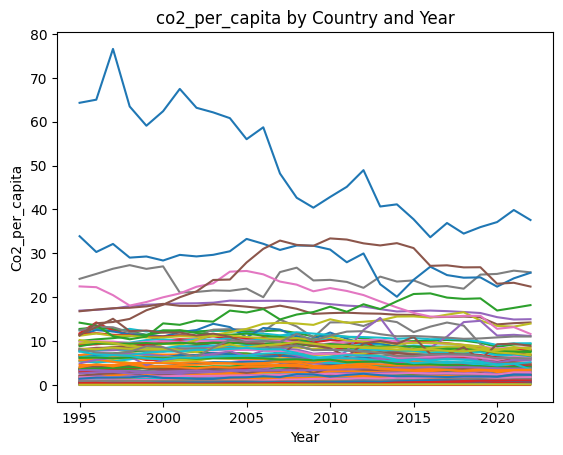

In [11]:
graph_gasses_dataframe( gasses_yearly_data["co2_per_capita"], 'co2_per_capita' )


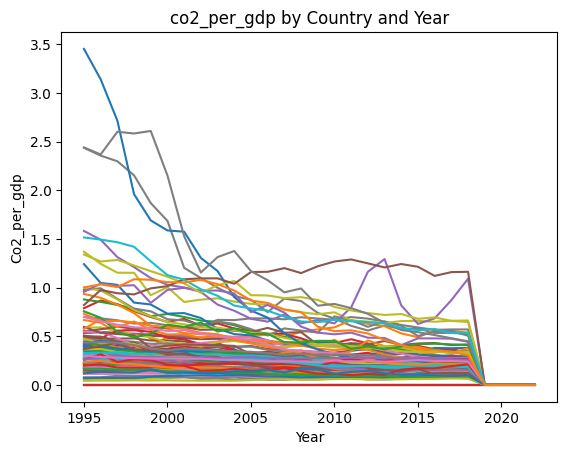

In [12]:
graph_gasses_dataframe( gasses_yearly_data["co2_per_gdp"], 'co2_per_gdp' )


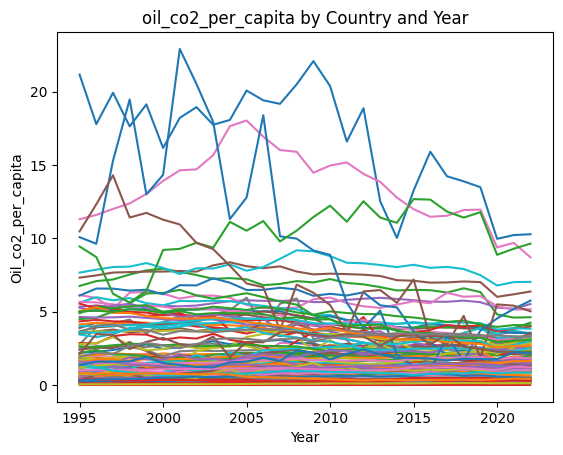

In [13]:
graph_gasses_dataframe( gasses_yearly_data["oil_co2_per_capita"], 'oil_co2_per_capita' )


In [14]:
interesting_features = [ 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_including_luc', 'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'energy_per_capita', 'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'primary_energy_consumption' ]

data = { }

first_feature = interesting_features[ 0 ]

base_dataset = gasses_yearly_data[ first_feature ]

keys_data = base_dataset.index
keys_for_each_year = base_dataset.columns

first_year = keys_data[ 0 ]

for year in keys_data:
    rotated = base_dataset.loc[ year ].transpose( )

    second_feature = interesting_features[ 1 ]
    year_data = gasses_yearly_data[ second_feature ].loc[ year ].transpose( )

    new_data = pd.merge( rotated, year_data, left_index=True, right_index=True )
    new_data.columns = ( 'population', 'gdp' )

    data[ year ] = new_data

for year in keys_data:
    for i in range( 2, len( interesting_features ) ):
        feature_name = interesting_features[ i ]
        new_data = pd.merge( new_data, gasses_yearly_data[ feature_name ].loc[ year ].transpose( ), left_index=True, right_index=True )
        new_data.rename( columns={ new_data.columns[ -1 ] : feature_name }, inplace=True )

    data[ year ] = new_data

for year in keys_data:
    display( year )
    display( data[ year ] )

# data is grouped by years, access by data[ year ],
# indexed by country with each column being a feature

1995

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                6919.917           1.959    0.051               0.016   
Algeria               10996.016           2.159   47.222               1.658   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             17977.289           1.361   53.195               1.522   
Australia             64117.020           2.102   39.847               2.213   
...                         ...             ...      ...                 ...   
Turkmenistan          25405.623           7.580   25.645               6.068   
Uganda                  347.494           0.329    0.000               0.000   
Ukraine               36226.188           7.184  134.048               2.625   
Uruguay               11284.824           0.943    0.000               0.000   
Uzbekistan            22078.691           4.860   78.285               3.400   

              oil_co2  oil_co2_per_capita  primary_energy_consumption  
Country                                                                
Albania         1.773               0.540                      22.728  
Algeria        27.081               0.951                     313.145  
Andorra         0.425               6.752                       0.000  
Argentina      62.836               1.798                     628.236  
Australia      96.068               5.336                    1154.299  
...               ...                 ...                         ...  
Turkmenistan    8.111               1.919                     107.380  
Uganda          0.898               0.043                       7.186  
Ukraine        72.310               1.416                    1849.755  
Uruguay         4.287               1.336                      36.205  
Uzbekistan     18.624               0.809                     508.389  

[102 rows x 16 columns]

1996

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           0.617        0.159     0.114   
Algeria               10996.016  ...           3.451        0.639     1.407   
Andorra                   0.000  ...           7.081        0.000     0.000   
Argentina             17977.289  ...           3.705        0.268     3.100   
Australia             64117.020  ...          17.128        0.543   160.388   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           7.360        2.368     0.264   
Uganda                  347.494  ...           0.048        0.044     0.000   
Ukraine               36226.188  ...           6.950        1.493   146.215   
Uruguay               11284.824  ...           1.675        0.134     0.004   
Uzbekistan            22078.691  ...           4.610        1.033     4.723   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                7645.640           1.965    0.044               0.013   
Algeria               10692.724           1.979   50.567               1.745   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18568.533           1.343   57.542               1.626   
Australia             65239.766           2.068   39.781               2.184   
...                         ...             ...      ...                 ...   
Turkmenistan          36365.113          11.701   20.738               4.822   
Uganda                  352.338           0.322    0.000               0.000   
Ukraine               34061.734           7.318  137.899               2.724   
Uruguay               11730.400           0.937    0.000               0.000   
Uzbekistan            22350.256           5.007   81.254     

1997

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           0.474        0.135     0.044   
Algeria               10996.016  ...           2.998        0.537     1.381   
Andorra                   0.000  ...           7.192        0.000     0.000   
Argentina             17977.289  ...           3.812        0.257     2.777   
Australia             64117.020  ...          17.400        0.533   167.683   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           7.149        2.601     0.000   
Uganda                  347.494  ...           0.049        0.044     0.000   
Ukraine               36226.188  ...           6.787        1.466   154.305   
Uruguay               11284.824  ...           1.699        0.130     0.004   
Uzbekistan            22078.691  ...           4.566        1.005     3.884   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                7020.859           2.004    0.037               0.011   
Algeria               10105.151           1.809   39.007               1.323   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18560.301           1.251   61.504               1.717   
Australia             66120.109           2.027   41.090               2.232   
...                         ...             ...      ...                 ...   
Turkmenistan          27446.891           9.984   21.166               4.850   
Uganda                  363.639           0.328    0.000               0.000   
Ukraine               33145.512           7.157  129.719               2.586   
Uruguay               12754.899           0.976    0.000               0.000   
Uzbekistan            21735.543           4.784   82.506     

1998

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           0.543        0.141     0.055   
Algeria               10996.016  ...           3.560        0.592     2.110   
Andorra                   0.000  ...           7.530        0.000     0.000   
Argentina             17977.289  ...           3.836        0.251     2.840   
Australia             64117.020  ...          17.963        0.527   177.614   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           7.547        2.583     0.000   
Uganda                  347.494  ...           0.054        0.047     0.000   
Ukraine               36226.188  ...           6.610        1.419   123.079   
Uruguay               11284.824  ...           1.728        0.127     0.004   
Uzbekistan            22078.691  ...           4.987        1.086     4.056   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                7602.231           1.971    0.033               0.010   
Algeria               10304.176           1.713   54.641               1.826   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18999.846           1.241   61.614               1.700   
Australia             67001.016           1.965   43.506               2.339   
...                         ...             ...      ...                 ...   
Turkmenistan          33653.324          11.520   20.035               4.521   
Uganda                  377.727           0.331    0.000               0.000   
Ukraine               32257.029           6.924  155.921               3.134   
Uruguay               15881.316           1.170    0.004               0.001   
Uzbekistan            21355.254           4.650   94.358     

1999

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           0.931        0.211     0.110   
Algeria               10996.016  ...           3.014        0.473     2.173   
Andorra                   0.000  ...           7.811        0.000     0.000   
Argentina             17977.289  ...           4.029        0.274     2.154   
Australia             64117.020  ...          18.295        0.518   183.231   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           8.842        2.609     0.000   
Uganda                  347.494  ...           0.054        0.045     0.000   
Ukraine               36226.188  ...           6.054        1.270   123.714   
Uruguay               11284.824  ...           2.038        0.155     0.004   
Uzbekistan            22078.691  ...           5.023        1.080     4.027   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                6892.834           1.563    0.029               0.009   
Algeria               10262.746           1.612   50.920               1.678   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18990.684           1.293   67.621               1.845   
Australia             69004.570           1.953   45.564               2.424   
...                         ...             ...      ...                 ...   
Turkmenistan          31627.238           9.334   24.518               5.447   
Uganda                  366.538           0.308    0.000               0.000   
Ukraine               32047.443           6.722  130.367               2.643   
Uruguay               14172.597           1.077    0.040               0.012   
Uzbekistan            23867.217           5.134   96.935     

2000

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           0.951        0.199     0.070   
Algeria               10996.016  ...           2.775        0.409     1.960   
Andorra                   0.000  ...           7.925        0.000     0.000   
Argentina             17977.289  ...           3.851        0.266     1.656   
Australia             64117.020  ...          18.404        0.506   185.797   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           8.615        2.151     0.000   
Uganda                  347.494  ...           0.057        0.047     0.000   
Ukraine               36226.188  ...           5.844        1.128   122.878   
Uruguay               11284.824  ...           1.600        0.124     0.004   
Uzbekistan            22078.691  ...           4.954        1.056     4.917   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                9029.438           1.888    0.022               0.007   
Algeria                9746.524           1.438   38.534               1.252   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18849.811           1.303   69.438               1.873   
Australia             68632.961           1.887   46.610               2.451   
...                         ...             ...      ...                 ...   
Turkmenistan          26223.863           6.548   24.948               5.460   
Uganda                  430.945           0.359    0.000               0.000   
Ukraine               32435.855           6.262  124.325               2.543   
Uruguay               14601.469           1.135    0.062               0.019   
Uzbekistan            24053.547           5.130   95.364     

2001

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.021        0.194     0.081   
Algeria               10996.016  ...           2.783        0.389     2.096   
Andorra                   0.000  ...           7.723        0.000     0.000   
Argentina             17977.289  ...           3.586        0.261     1.290   
Australia             64117.020  ...          18.588        0.501   190.082   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           7.343        1.527     0.000   
Uganda                  347.494  ...           0.057        0.045     0.000   
Ukraine               36226.188  ...           6.277        1.081   131.831   
Uruguay               11284.824  ...           1.524        0.124     0.004   
Uzbekistan            22078.691  ...           4.999        1.053     5.049   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                8635.532           1.644    0.015               0.005   
Algeria                9961.640           1.391   41.029               1.315   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18210.119           1.325   64.809               1.729   
Australia             68338.281           1.843   49.326               2.563   
...                         ...             ...      ...                 ...   
Turkmenistan          32628.650           6.787   20.372               4.395   
Uganda                  426.191           0.336    0.000               0.000   
Ukraine               32281.633           5.560  130.433               2.694   
Uruguay               15946.608           1.297    0.059               0.018   
Uzbekistan            23824.650           5.017   96.840     

2002

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.200        0.215     0.084   
Algeria               10996.016  ...           2.868        0.370     2.609   
Andorra                   0.000  ...           7.497        0.000     0.000   
Argentina             17977.289  ...           3.285        0.270     1.099   
Australia             64117.020  ...          18.615        0.486   191.147   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           6.412        1.155     0.000   
Uganda                  347.494  ...           0.057        0.043     0.000   
Ukraine               36226.188  ...           6.168        0.983   136.228   
Uruguay               11284.824  ...           1.378        0.122     0.004   
Uzbekistan            22078.691  ...           5.183        1.080     5.042   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                9443.555           1.694    0.026               0.008   
Algeria               10180.350           1.312   44.653               1.412   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             17275.256           1.419   62.620               1.653   
Australia             68892.781           1.797   50.589               2.598   
...                         ...             ...      ...                 ...   
Turkmenistan          27147.498           4.889   14.520               3.090   
Uganda                  423.493           0.322    0.000               0.000   
Ukraine               32374.943           5.159  116.284               2.424   
Uruguay               14137.804           1.255    0.040               0.012   
Uzbekistan            24111.441           5.024  102.056     

2003

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.391        0.233     0.084   
Algeria               10996.016  ...           2.950        0.346     2.788   
Andorra                   0.000  ...           7.236        0.000     0.000   
Argentina             17977.289  ...           3.501        0.266     1.990   
Australia             64117.020  ...          18.754        0.477   195.386   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           8.524        1.313     0.000   
Uganda                  347.494  ...           0.057        0.043     0.000   
Ukraine               36226.188  ...           6.454        0.916   132.444   
Uruguay               11284.824  ...           1.368        0.121     0.004   
Uzbekistan            22078.691  ...           5.030        1.035     3.877   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               10756.612           1.802    0.026               0.008   
Algeria               10510.461           1.232   44.027               1.373   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             18326.521           1.391   69.070               1.804   
Australia             69082.789           1.759   49.717               2.524   
...                         ...             ...      ...                 ...   
Turkmenistan          37007.590           5.698   22.552               4.739   
Uganda                  432.856           0.320    0.000               0.000   
Ukraine               33439.895           4.748  128.304               2.695   
Uruguay               14181.147           1.252    0.110               0.033   
Uzbekistan            21826.992           4.490  100.298     

2004

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.364        0.213     0.084   
Algeria               10996.016  ...           2.821        0.309     1.924   
Andorra                   0.000  ...           7.285        0.000     0.000   
Argentina             17977.289  ...           4.053        0.284     2.198   
Australia             64117.020  ...          19.216        0.473   202.225   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.240        1.376     0.000   
Uganda                  347.494  ...           0.059        0.043     0.000   
Ukraine               36226.188  ...           6.572        0.815   135.323   
Uruguay               11284.824  ...           1.679        0.142     0.004   
Uzbekistan            22078.691  ...           4.921        0.970     4.584   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11586.951           1.812    0.033               0.011   
Algeria               10759.022           1.179   41.209               1.268   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             19261.457           1.348   82.911               2.144   
Australia             70486.320           1.735   52.534               2.637   
...                         ...             ...      ...                 ...   
Turkmenistan          36185.508           4.864   30.884               6.408   
Uganda                  447.659           0.325    0.000               0.000   
Ukraine               33554.930           4.162  128.409               2.717   
Uruguay               13627.525           1.150    0.194               0.059   
Uzbekistan            21485.609           4.234   99.793     

2005

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.405        0.205     0.073   
Algeria               10996.016  ...           3.368        0.340     2.363   
Andorra                   0.000  ...           7.205        0.000     0.000   
Argentina             17977.289  ...           4.126        0.267     3.268   
Australia             64117.020  ...          19.146        0.459   200.715   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           9.810        1.169     0.000   
Uganda                  347.494  ...           0.072        0.049     0.000   
Ukraine               36226.188  ...           6.683        0.785   135.906   
Uruguay               11284.824  ...           1.726        0.136     0.004   
Uzbekistan            22078.691  ...           4.576        0.867     4.426   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11545.616           1.685    0.022               0.007   
Algeria               11113.723           1.121   61.211               1.857   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             20232.844           1.309   81.967               2.098   
Australia             69917.164           1.678   54.492               2.701   
...                         ...             ...      ...                 ...   
Turkmenistan          36145.840           4.307   29.821               6.104   
Uganda                  493.468           0.337    0.000               0.000   
Ukraine               34223.043           4.020  130.363               2.779   
Uruguay               14696.390           1.161    0.183               0.055   
Uzbekistan            21171.098           4.012   95.455     

2006

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.302        0.177     0.073   
Algeria               10996.016  ...           3.167        0.306     2.700   
Andorra                   0.000  ...           6.804        0.000     0.000   
Argentina             17977.289  ...           4.413        0.266     3.866   
Australia             64117.020  ...          19.174        0.452   204.401   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           9.992        1.076     0.000   
Uganda                  347.494  ...           0.083        0.055     0.000   
Ukraine               36226.188  ...           7.148        0.763   154.040   
Uruguay               11284.824  ...           1.986        0.151     0.007   
Uzbekistan            22078.691  ...           4.639        0.842     4.752   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               10976.728           1.490    0.022               0.007   
Algeria               11341.980           1.097   49.306               1.475   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             21038.723           1.267   83.869               2.125   
Australia             71863.758           1.693   55.826               2.728   
...                         ...             ...      ...                 ...   
Turkmenistan          36023.754           3.878   31.518               6.362   
Uganda                  465.703           0.308    0.000               0.000   
Ukraine               34864.605           3.719  126.738               2.720   
Uruguay               13377.312           1.019    0.213               0.064   
Uzbekistan            19566.176           3.550   97.931     

2007

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.327        0.168     0.073   
Algeria               10996.016  ...           3.234        0.296     3.012   
Andorra                   0.000  ...           6.889        0.000     0.000   
Argentina             17977.289  ...           4.351        0.242     3.660   
Australia             64117.020  ...          19.187        0.437   203.559   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...           9.788        0.951     0.000   
Uganda                  347.494  ...           0.091        0.058     0.000   
Ukraine               36226.188  ...           7.273        0.701   161.469   
Uruguay               11284.824  ...           1.787        0.129     0.011   
Uzbekistan            22078.691  ...           4.534        0.774     5.034   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                9534.874           1.204    0.033               0.011   
Algeria               11759.701           1.075   51.076               1.503   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             21708.369           1.205   87.178               2.186   
Australia             72304.695           1.648   61.064               2.931   
...                         ...             ...      ...                 ...   
Turkmenistan          34462.887           3.350   30.718               6.113   
Uganda                  545.608           0.345    0.000               0.000   
Ukraine               34933.590           3.367  119.444               2.579   
Uruguay               15803.453           1.139    0.194               0.058   
Uzbekistan            20663.172           3.527   98.525     

2008

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.490        0.173     0.103   
Algeria               10996.016  ...           3.213        0.281     3.008   
Andorra                   0.000  ...           7.080        0.000     0.000   
Argentina             17977.289  ...           4.649        0.249     3.877   
Australia             64117.020  ...          19.026        0.429   204.688   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.654        0.991     0.000   
Uganda                  347.494  ...           0.091        0.054     0.000   
Ukraine               36226.188  ...           7.077        0.652   154.640   
Uruguay               11284.824  ...           2.458        0.166     0.004   
Uzbekistan            22078.691  ...           4.630        0.748     4.924   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               10499.328           1.216    0.015               0.005   
Algeria               12252.297           1.071   51.551               1.491   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             21780.381           1.169   90.120               2.238   
Australia             72089.344           1.626   61.803               2.909   
...                         ...             ...      ...                 ...   
Turkmenistan          27853.562           2.367   40.073               7.857   
Uganda                  557.287           0.330    0.000               0.000   
Ukraine               33911.270           3.127  114.802               2.492   
Uruguay               16750.070           1.134    0.172               0.052   
Uzbekistan            19085.639           3.082  102.570     

2009

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.504        0.166     0.388   
Algeria               10996.016  ...           3.377        0.284     1.594   
Andorra                   0.000  ...           6.993        0.000     0.000   
Argentina             17977.289  ...           4.378        0.251     3.232   
Australia             64117.020  ...          18.812        0.422   206.066   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.126        0.814     0.000   
Uganda                  347.494  ...           0.095        0.054     0.000   
Ukraine               36226.188  ...           6.053        0.644   136.611   
Uruguay               11284.824  ...           2.376        0.158     0.004   
Uzbekistan            22078.691  ...           3.878        0.598     5.306   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11524.428           1.276    0.018               0.006   
Algeria               12753.120           1.073   54.894               1.560   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             20954.271           1.202   87.995               2.163   
Australia             69689.844           1.564   63.482               2.931   
...                         ...             ...      ...                 ...   
Turkmenistan          44702.367           3.595   34.497               6.658   
Uganda                  552.865           0.314    0.000               0.000   
Ukraine               29011.010           3.087   89.978               1.962   
Uruguay               17655.945           1.174    0.121               0.036   
Uzbekistan            18643.188           2.874   86.133     

2010

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.642        0.173     0.429   
Algeria               10996.016  ...           3.301        0.263     1.216   
Andorra                   0.000  ...           7.221        0.000     0.000   
Argentina             17977.289  ...           4.522        0.237     3.990   
Australia             64117.020  ...          18.416        0.408   200.552   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.235        0.832     0.000   
Uganda                  347.494  ...           0.110        0.060     0.000   
Ukraine               36226.188  ...           6.444        0.670   145.421   
Uruguay               11284.824  ...           1.879        0.115     0.004   
Uzbekistan            22078.691  ...           3.763        0.552     5.151   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               12377.504           1.307    0.026               0.009   
Algeria               12243.156           0.974   53.368               1.488   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             21507.703           1.126   86.928               2.115   
Australia             68523.875           1.518   64.632               2.935   
...                         ...             ...      ...                 ...   
Turkmenistan          47374.234           3.509   39.685               7.533   
Uganda                  604.450           0.330    0.000               0.000   
Ukraine               31235.119           3.247  100.442               2.199   
Uruguay               18292.451           1.123    0.150               0.045   
Uzbekistan            18563.715           2.722   85.196     

2011

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.832        0.187     0.535   
Algeria               10996.016  ...           3.423        0.260     1.048   
Andorra                   0.000  ...           6.956        0.000     0.000   
Argentina             17977.289  ...           4.568        0.227     4.723   
Australia             64117.020  ...          18.082        0.394   192.141   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          12.154        0.789     0.000   
Uganda                  347.494  ...           0.115        0.061     0.000   
Ukraine               36226.188  ...           6.775        0.654   153.853   
Uruguay               11284.824  ...           2.276        0.133     0.004   
Uzbekistan            22078.691  ...           4.018        0.561     5.415   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               10854.649           1.107    0.029               0.010   
Algeria               12710.541           0.964   56.721               1.552   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             21894.867           1.087   92.587               2.230   
Australia             69714.188           1.519   66.868               2.991   
...                         ...             ...      ...                 ...   
Turkmenistan          51670.953           3.356   43.327               8.082   
Uganda                  614.269           0.325    0.000               0.000   
Ukraine               32400.471           3.130  104.231               2.290   
Uruguay               17861.395           1.046    0.147               0.044   
Uzbekistan            19236.137           2.687   95.132     

2012

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.677        0.168     0.627   
Algeria               10996.016  ...           3.641        0.272     1.037   
Andorra                   0.000  ...           6.860        0.000     0.000   
Argentina             17977.289  ...           4.560        0.231     5.009   
Australia             64117.020  ...          17.888        0.382   189.154   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          12.263        0.730     0.000   
Uganda                  347.494  ...           0.106        0.056     0.000   
Ukraine               36226.188  ...           6.704        0.645   158.981   
Uruguay               11284.824  ...           2.549        0.144     0.007   
Uzbekistan            22078.691  ...           4.029        0.528     5.470   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               10652.809           1.068    0.029               0.010   
Algeria               13624.909           1.020   64.114               1.721   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             22494.715           1.141   95.381               2.274   
Australia             67583.031           1.443   68.090               2.996   
...                         ...             ...      ...                 ...   
Turkmenistan          55318.344           3.294   42.865               7.853   
Uganda                  577.693           0.308    0.000               0.000   
Ukraine               31779.547           3.055   97.270               2.142   
Uruguay               17839.785           1.006    0.106               0.032   
Uzbekistan            18406.984           2.412   98.243     

2013

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.831        0.181     0.795   
Algeria               10996.016  ...           3.705        0.275     0.725   
Andorra                   0.000  ...           6.673        0.000     0.000   
Argentina             17977.289  ...           4.471        0.224     4.840   
Australia             64117.020  ...          17.276        0.367   176.363   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.572        0.637     0.000   
Uganda                  347.494  ...           0.106        0.056     0.000   
Ukraine               36226.188  ...           6.566        0.630   160.185   
Uruguay               11284.824  ...           2.216        0.120     0.011   
Uzbekistan            22078.691  ...           3.747        0.462     8.013   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               13392.774           1.327    0.033               0.011   
Algeria               14130.735           1.049   65.450               1.722   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             23152.588           1.158   91.338               2.155   
Australia             67307.039           1.431   69.870               3.023   
...                         ...             ...      ...                 ...   
Turkmenistan          48244.711           2.657   40.000               7.194   
Uganda                  651.414           0.345    0.000               0.000   
Ukraine               30228.559           2.900   90.477               1.997   
Uruguay               18592.736           1.009    0.099               0.029   
Uzbekistan            18200.295           2.243   88.314     

2014

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           2.080        0.202     1.029   
Algeria               10996.016  ...           3.903        0.285     0.546   
Andorra                   0.000  ...           6.444        0.000     0.000   
Argentina             17977.289  ...           4.399        0.228     5.536   
Australia             64117.020  ...          16.747        0.352   168.146   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.089        0.564     0.000   
Uganda                  347.494  ...           0.113        0.058     0.000   
Ukraine               36226.188  ...           5.707        0.584   138.373   
Uruguay               11284.824  ...           1.971        0.104     0.004   
Uzbekistan            22078.691  ...           3.527        0.409     7.430   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11809.461           1.148    0.059               0.020   
Algeria               15108.635           1.102   73.831               1.905   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             22881.006           1.186   92.844               2.168   
Australia             66744.195           1.402   70.772               3.015   
...                         ...             ...      ...                 ...   
Turkmenistan          49096.004           2.495   37.970               6.705   
Uganda                  728.951           0.378    0.000               0.000   
Ukraine               26764.613           2.738   75.185               1.665   
Uruguay               19071.291           1.005    0.092               0.027   
Uzbekistan            18518.158           2.145   84.416     

2015

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.635        0.155     0.322   
Algeria               10996.016  ...           4.048        0.290     0.502   
Andorra                   0.000  ...           6.484        0.000     0.000   
Argentina             17977.289  ...           4.433        0.226     5.467   
Australia             64117.020  ...          16.850        0.350   174.205   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.155        0.542     0.000   
Uganda                  347.494  ...           0.121        0.061     0.000   
Ukraine               36226.188  ...           4.975        0.562   119.393   
Uruguay               11284.824  ...           1.981        0.104     0.004   
Uzbekistan            22078.691  ...           3.350        0.365     5.991   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11824.314           1.120    0.062               0.022   
Algeria               15616.311           1.120   78.769               1.992   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             23046.873           1.176   93.535               2.162   
Australia             67234.930           1.398   71.501               3.002   
...                         ...             ...      ...                 ...   
Turkmenistan          57717.438           2.806   39.487               6.848   
Uganda                  707.743           0.360    0.000               0.000   
Ukraine               22306.594           2.520   65.487               1.456   
Uruguay               19596.402           1.029    0.095               0.028   
Uzbekistan            17386.195           1.896   81.945     

2016

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.608        0.147     0.191   
Algeria               10996.016  ...           3.929        0.276     0.000   
Andorra                   0.000  ...           6.463        0.000     0.000   
Argentina             17977.289  ...           4.349        0.229     4.192   
Australia             64117.020  ...          16.956        0.349   179.562   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.982        0.512     0.000   
Uganda                  347.494  ...           0.124        0.062     0.000   
Ukraine               36226.188  ...           5.218        0.574   126.828   
Uruguay               11284.824  ...           1.910        0.099     0.004   
Uzbekistan            22078.691  ...           3.502        0.360     7.094   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               13823.748           1.265    0.161               0.056   
Algeria               15295.143           1.074   78.677               1.950   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             22726.455           1.198   96.303               2.205   
Australia             66407.094           1.366   73.936               3.056   
...                         ...             ...      ...                 ...   
Turkmenistan          56153.699           2.616   39.485               6.728   
Uganda                  765.058           0.382    0.000               0.000   
Ukraine               23419.848           2.578   64.067               1.429   
Uruguay               19814.260           1.029    0.106               0.031   
Uzbekistan            16374.342           1.683   86.994     

2017

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.838        0.162     0.275   
Algeria               10996.016  ...           4.013        0.284     0.795   
Andorra                   0.000  ...           6.301        0.000     0.000   
Argentina             17977.289  ...           4.242        0.220     4.279   
Australia             64117.020  ...          16.822        0.343   176.932   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.783        0.480     0.000   
Uganda                  347.494  ...           0.134        0.066     0.000   
Ukraine               36226.188  ...           4.995        0.534   112.586   
Uruguay               11284.824  ...           1.801        0.091     0.004   
Uzbekistan            22078.691  ...           3.410        0.341     6.690   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               12802.360           1.128    0.168               0.058   
Algeria               15164.000           1.072   82.352               2.002   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             22503.818           1.166   96.442               2.189   
Australia             65146.316           1.329   75.431               3.068   
...                         ...             ...      ...                 ...   
Turkmenistan          54625.520           2.431   39.487               6.616   
Uganda                  804.894           0.397    0.000               0.000   
Ukraine               21840.365           2.335   66.621               1.492   
Uruguay               19084.248           0.968    0.121               0.035   
Uzbekistan            16642.676           1.663   85.866     

2018

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.701        0.144     0.473   
Algeria               10996.016  ...           4.085        0.290     1.330   
Andorra                   0.000  ...           6.592        0.000     0.000   
Argentina             17977.289  ...           4.066        0.218     4.356   
Australia             64117.020  ...          16.628        0.335   169.394   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.513        0.448     0.000   
Uganda                  347.494  ...           0.133        0.064     0.000   
Ukraine               36226.188  ...           5.212        0.537   120.544   
Uruguay               11284.824  ...           1.917        0.096     0.004   
Uzbekistan            22078.691  ...           3.152        0.304     9.658   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               14609.701           1.236    0.150               0.052   
Algeria               15971.084           1.134   88.887               2.120   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             22163.160           1.187   96.123               2.164   
Australia             65072.668           1.312   78.468               3.141   
...                         ...             ...      ...                 ...   
Turkmenistan          59849.832           2.549   39.487               6.511   
Uganda                  841.204           0.403    0.000               0.000   
Ukraine               22768.459           2.346   66.949               1.506   
Uruguay               19538.711           0.977    0.114               0.033   
Uzbekistan            16445.740           1.584   75.676     

2019

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.680          0.0     0.322   
Algeria               10996.016  ...           4.182          0.0     1.096   
Andorra                   0.000  ...           6.334          0.0     0.000   
Argentina             17977.289  ...           3.989          0.0     2.143   
Australia             64117.020  ...          16.398          0.0   164.947   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.607          0.0     0.000   
Uganda                  347.494  ...           0.133          0.0     0.000   
Ukraine               36226.188  ...           5.020          0.0   114.046   
Uruguay               11284.824  ...           1.893          0.0     0.004   
Uzbekistan            22078.691  ...           3.288          0.0     8.284   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11585.555             0.0    0.132               0.046   
Algeria               16259.053             0.0   91.250               2.137   
Andorra                   0.000             0.0    0.000               0.000   
Argentina             20725.168             0.0   95.608               2.137   
Australia             66263.539             0.0   80.661               3.181   
...                         ...             ...      ...                 ...   
Turkmenistan          57961.055             0.0   41.143               6.681   
Uganda                  811.628             0.0    0.000               0.000   
Ukraine               21661.146             0.0   60.388               1.366   
Uruguay               19985.010             0.0    0.165               0.048   
Uzbekistan            16212.221             0.0   83.148     

2020

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.751          0.0     0.568   
Algeria               10996.016  ...           3.910          0.0     0.502   
Andorra                   0.000  ...           4.808          0.0     0.000   
Argentina             17977.289  ...           3.705          0.0     3.957   
Australia             64117.020  ...          15.453          0.0   156.681   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          10.831          0.0     0.000   
Uganda                  347.494  ...           0.125          0.0     0.000   
Ukraine               36226.188  ...           4.710          0.0   102.155   
Uruguay               11284.824  ...           1.889          0.0     0.004   
Uzbekistan            22078.691  ...           3.270          0.0    11.512   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               11158.003             0.0    0.103               0.036   
Algeria               14933.807             0.0   88.267               2.031   
Andorra                   0.000             0.0    0.000               0.000   
Argentina             19314.066             0.0   89.083               1.978   
Australia             61826.211             0.0   83.480               3.252   
...                         ...             ...      ...                 ...   
Turkmenistan          67626.922             0.0   42.811               6.849   
Uganda                  766.414             0.0    0.000               0.000   
Ukraine               20916.844             0.0   60.606               1.380   
Uruguay               17631.439             0.0    0.125               0.036   
Uzbekistan            15860.609             0.0   79.241     

2021

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.718          0.0     0.539   
Algeria               10996.016  ...           4.080          0.0     0.502   
Andorra                   0.000  ...           4.592          0.0     0.000   
Argentina             17977.289  ...           4.191          0.0     4.946   
Australia             64117.020  ...          14.915          0.0   151.543   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.034          0.0     0.000   
Uganda                  347.494  ...           0.132          0.0     0.000   
Ukraine               36226.188  ...           4.828          0.0   103.800   
Uruguay               11284.824  ...           2.365          0.0     0.004   
Uzbekistan            22078.691  ...           3.415          0.0    10.361   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania               14100.432             0.0    0.113               0.040   
Algeria               15914.461             0.0   97.323               2.203   
Andorra                   0.000             0.0    0.000               0.000   
Argentina             21328.186             0.0   93.030               2.055   
Australia             61439.910             0.0   80.159               3.092   
...                         ...             ...      ...                 ...   
Turkmenistan          70866.023             0.0   45.947               7.245   
Uganda                  766.846             0.0    0.000               0.000   
Ukraine               21459.945             0.0   59.839               1.375   
Uruguay               18316.926             0.0    0.135               0.039   
Uzbekistan            16552.881             0.0   84.289     

2022

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Country                                                                     
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Country                                                                  
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  ...  co2_per_capita  co2_per_gdp  coal_co2  \
Country                          ...                                          
Albania                6919.917  ...           1.743          0.0     0.529   
Algeria               10996.016  ...           3.927          0.0     0.502   
Andorra                   0.000  ...           4.617          0.0     0.000   
Argentina             17977.289  ...           4.238          0.0     4.946   
Australia             64117.020  ...          14.985          0.0   144.105   
...                         ...  ...             ...          ...       ...   
Turkmenistan          25405.623  ...          11.034          0.0     0.000   
Uganda                  347.494  ...           0.127          0.0     0.000   
Ukraine               36226.188  ...           3.558          0.0    56.817   
Uruguay               11284.824  ...           2.306          0.0     0.004   
Uzbekistan            22078.691  ...           3.483          0.0    11.512   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Country                                                                        
Albania                   0.000             0.0    0.113               0.040   
Algeria               15252.127             0.0   89.967               2.004   
Andorra                   0.000             0.0    0.000               0.000   
Argentina             21994.422             0.0   92.466               2.032   
Australia             63458.840             0.0   83.499               3.190   
...                         ...             ...      ...                 ...   
Turkmenistan          71367.344             0.0   46.991               7.307   
Uganda                    0.000             0.0    0.000               0.000   
Ukraine               16309.124             0.0   42.131               1.061   
Uruguay                   0.000             0.0    0.135               0.039   
Uzbekistan            16929.814             0.0   87.822     

Cleaning HDI dataset and concatenating it to the one above

In [15]:

development_using = datasets['development']

development_using.index = development_using[ 'country' ]

development_using

concatenated_data = { }
for year in range( 1995, 2022 ):
    df_gasses = data[ year ]

    wanted_columns = [ f'hdi_{ year }', f'le_{ year }', f'gnipc_{ year }' ]
    dropping_columns = list( set( development_using.columns ) - set( wanted_columns ) )

    concatenated_data[ year ] = pd.merge( df_gasses, development_using.drop( columns=dropping_columns ), left_index=True, right_index=True )

    concatenated_data[ year ].rename( columns={
        f'hdi_{ year }' : 'hdi',
        f'le_{ year }' : 'le',
        f'gnipc_{ year }' : 'gnipc'
    }, inplace=True )

concatenated_data[ 1995 ]
# country, hdi_YEAR

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Albania        2842318.0  0.0       0.103                  0.031    2.089   
Algeria       44903228.0  0.0       3.165                  0.111   96.777   
Andorra          79843.0  0.0       0.000                  0.000    0.425   
Argentina     45510324.0  0.0       2.621                  0.075  125.240   
Australia     26177410.0  0.0       3.358                  0.187  305.056   
...                  ...  ...         ...                    ...      ...   
Turkmenistan   6430777.0  0.0       0.177                  0.042   34.569   
Uganda        47249588.0  0.0       0.028                  0.001    0.925   
Ukraine       39701744.0  0.0       3.408                  0.067  390.072   
Uruguay        3422796.0  0.0       0.270                  0.084    4.557   
Uzbekistan    34627648.0  0.0       1.545                  0.067  104.803   

              co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Albania                   2.581           0.636        0.180     0.161   
Algeria                 108.142           3.398        0.667     1.935   
Andorra                   0.473           6.752        0.000     0.000   
Argentina               164.034           3.584        0.271     3.701   
Australia               497.653          16.945        0.555   155.735   
...                         ...             ...          ...       ...   
Turkmenistan             37.885           8.179        2.440     0.000   
Uganda                   15.475           0.045        0.042     0.000   
Ukraine                 395.485           7.639        1.515   174.093   
Uruguay                   3.331           1.420        0.119     0.000   
Uzbekistan              105.017           4.551        1.002     4.210   

              energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Albania                6919.917           1.959    0.051               0.016   
Algeria               10996.016           2.159   47.222               1.658   
Andorra                   0.000           0.000    0.000               0.000   
Argentina             17977.289           1.361   53.195               1.522   
Australia             64117.020           2.102   39.847               2.213   
...                         ...             ...      ...                 ...   
Turkmenistan          25405.623           7.580   25.645               6.068   
Uganda                  347.494           0.329    0.000               0.000   
Ukraine               36226.188           7.184  134.048               2.625   
Uruguay               11284.824           0.943    0.000               0.000   
Uzbekistan            22078.691           4.860   78.285               3.400   

              oil_co2  oil_co2_per_capita  primary_energy_consumption    hdi  \
Albania         1.773               0.540                      22.728  0.634   
Algeria        27.081               0.951                     313.145  0.606   
Andorra         0.425               6.752                       0.000    NaN   
Argentina      62.836               1.798                     628.236  0.745   
Australia      96.068               5.336                    1154.299  0.882   
...               ...                 ...                         ...    ...   
Turkmenistan    8.111               1.919                     107.380    NaN   
Uganda          0.898               0.043                       7.186  0.342   
Ukraine        72.310               1.416                    1849.755  0.684   
Uruguay         4.287               1.336                      36.205  0.717   
Uzbekistan     18.624               0.809                     508.389    NaN   

                   le    gnipc_1995  
Albania       74.3616   4583.051036  
Algeria       67.4544   7662.601491  
Andorra       78.9616  40270.767900  
Argentina     73.1333  17091.771260  
Australia     78.2619  32280.324940  
...               ...           ...  
Turkmenistan

In [16]:
replace = {
    'country' : 'country',
    'Measurement Year' : 'year',
    'PM2.5 (μg/m3)' : 'PM2.5',
    'PM10 (μg/m3)' : 'PM10',
    'NO2 (μg/m3)' : 'NO2',
}

datasets['air'].rename( columns=replace, inplace=True )
datasets['air'] # issue: air quality is ttaken from different cities, years arent increasing gradually

country          city  year  PM2.5   PM10    NO2
0      Argentina  Buenos Aires  2014  10.11    NaN    NaN
1      Argentina  Buenos Aires  2015  10.26  27.87    NaN
2      Argentina  Buenos Aires  2016    NaN  26.88  15.35
3      Argentina  Buenos Aires  2017    NaN  25.40  19.57
4      Argentina  Buenos Aires  2018    NaN  24.40  16.60
...          ...           ...   ...    ...    ...    ...
6131     Ukraine          Kyiv  2019  23.36  31.19    NaN
6132     Uruguay    Montevideo  2014   8.00  25.83    NaN
6133     Uruguay    Montevideo  2018  12.00  19.00    NaN
6134  Uzbekistan      Tashkent  2018  43.09    NaN    NaN
6135  Uzbekistan      Tashkent  2019  41.96    NaN    NaN

[6136 rows x 6 columns]